# Lab 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Attribute Information
1.	lettr	capital letter	(26 values from A to Z)
2.	x-box	horizontal position of box	(integer)
3.	y-box	vertical position of box	(integer)
4.	width	width of box			(integer)
5.	high 	height of box			(integer)
6.	onpix	total # on pixels		(integer)
7.	x-bar	mean x of on pixels in box	(integer)
8.	y-bar	mean y of on pixels in box	(integer)
9.	x2bar	mean x variance			(integer)
10.	y2bar	mean y variance			(integer)
11.	xybar	mean x y correlation		(integer)
12.	x2ybr	mean of x * x * y		(integer)
13.	xy2br	mean of x * y * y		(integer)
14.	x-ege	mean edge count left to right	(integer)
15.	xegvy	correlation of x-ege with y	(integer)
16.	y-ege	mean edge count bottom to top	(integer)
17.	yegvx	correlation of y-ege with x	(integer)

## Load the data

In [2]:
df = pd.read_csv('letter+recognition/letter-recognition.data')

In [3]:
df.head()

lettr  x-box  y-box  width  high   onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0     T      2      8      3      5      1      8     13      0      6      6   
1     I      5     12      3      7      2     10      5      5      4     13   
2     D      4     11      6      8      6     10      6      2      6     10   
3     N      7     11      6      6      3      5      9      4      6      4   
4     G      2      1      3      1      1      8      6      6      6      6   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9  
3      4     10      6     10      2      8  
4      5      9      1      7      5     10

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
target = "lettr"

## Pairwise correlation of columns

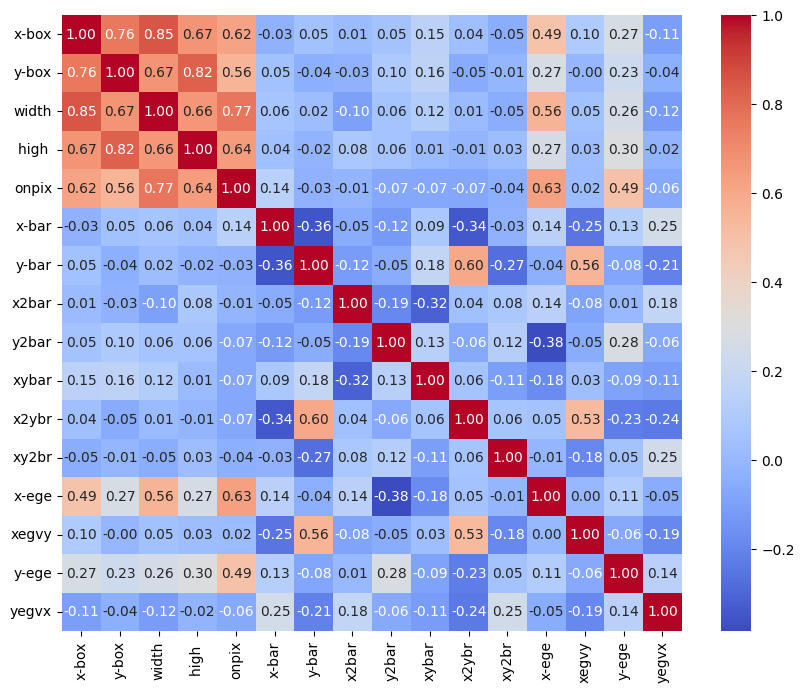

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

## Boxplots

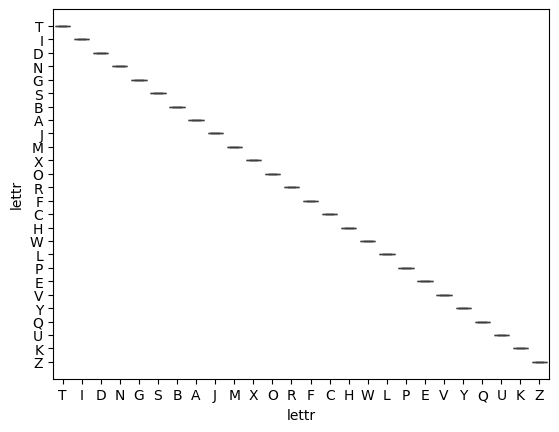

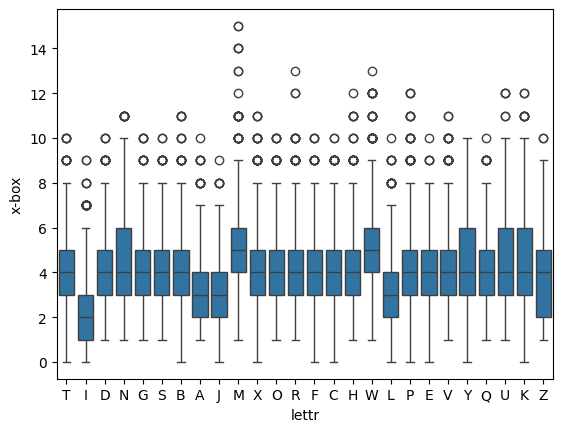

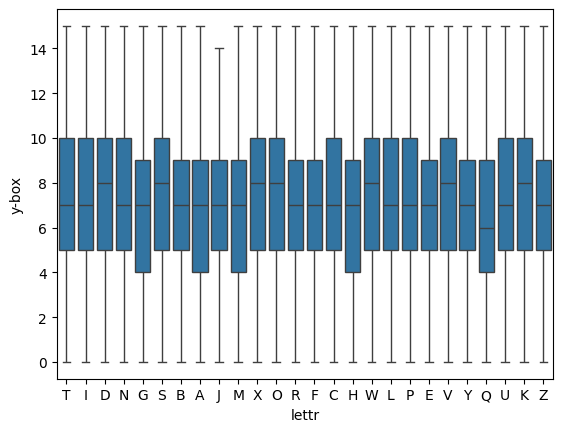

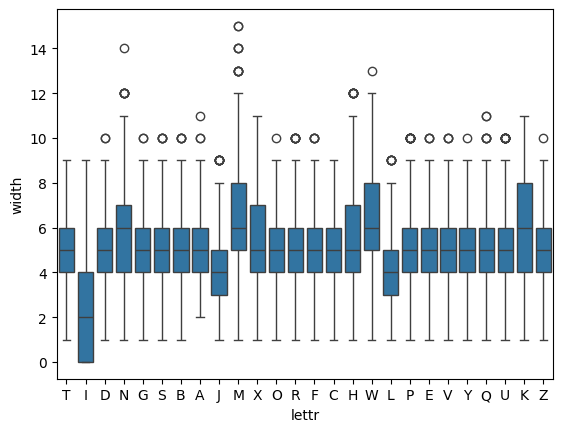

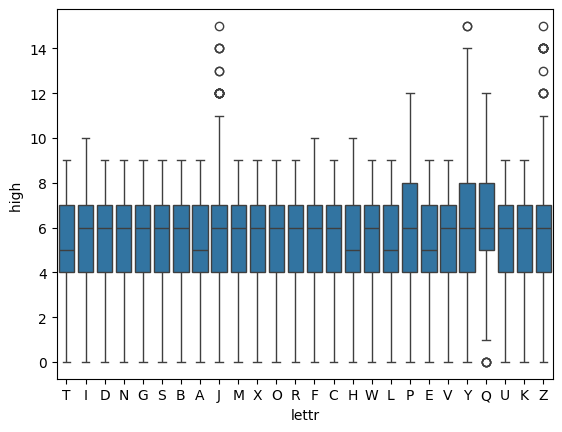

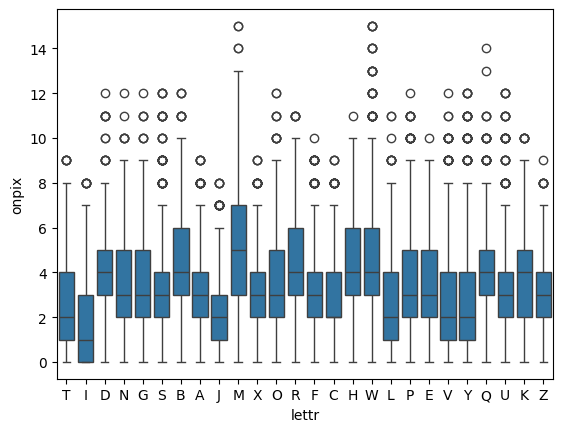

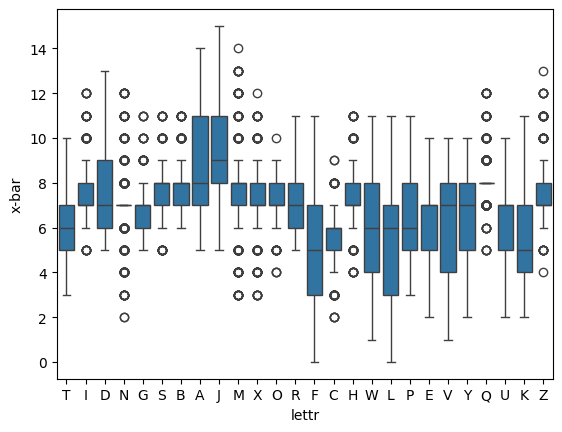

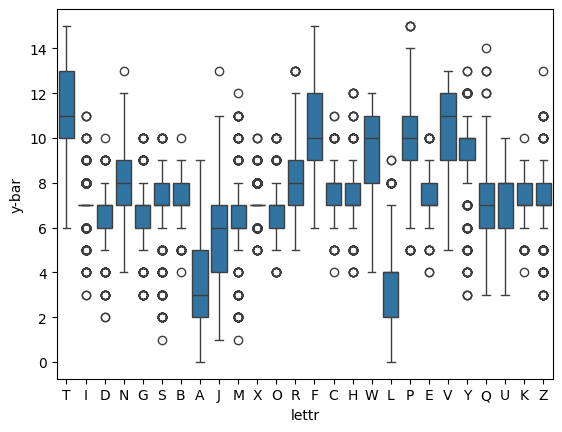

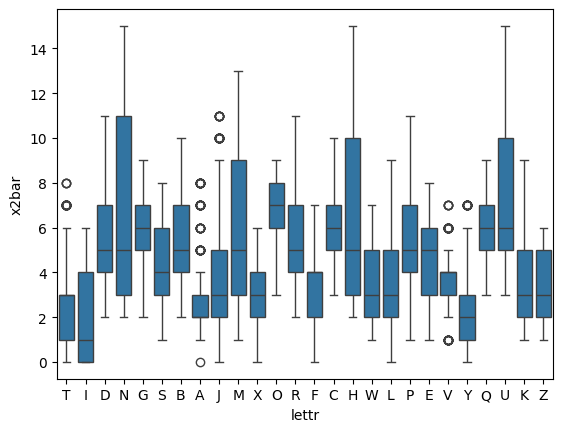

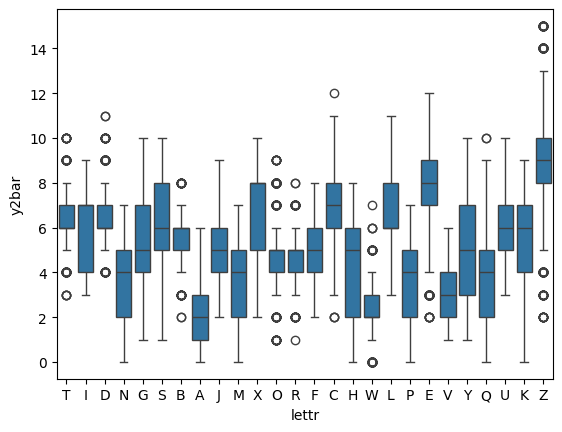

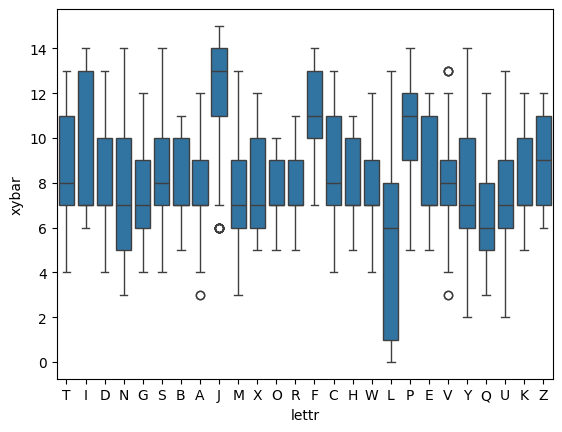

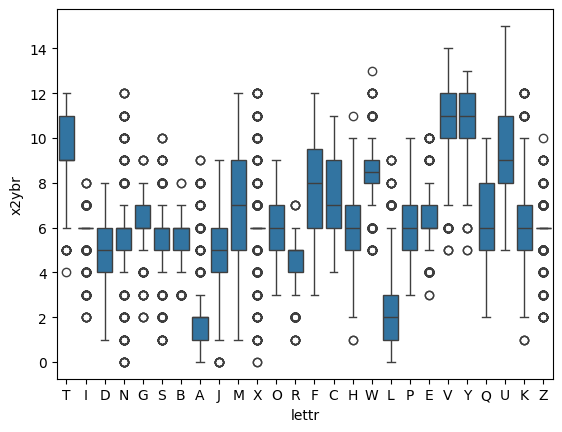

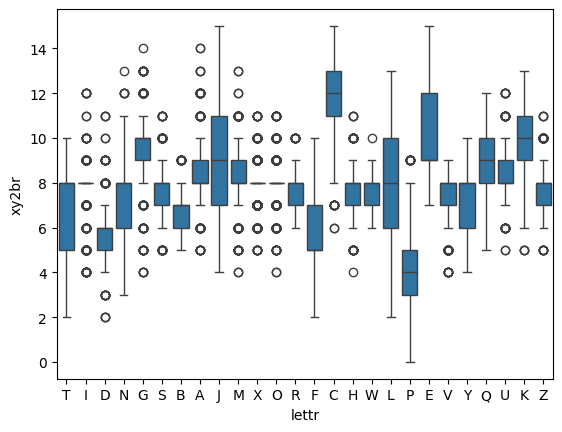

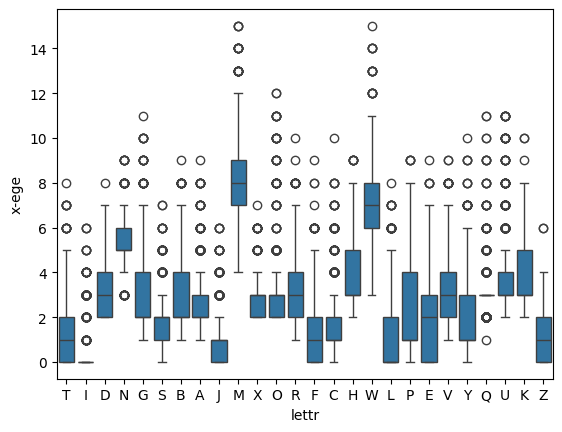

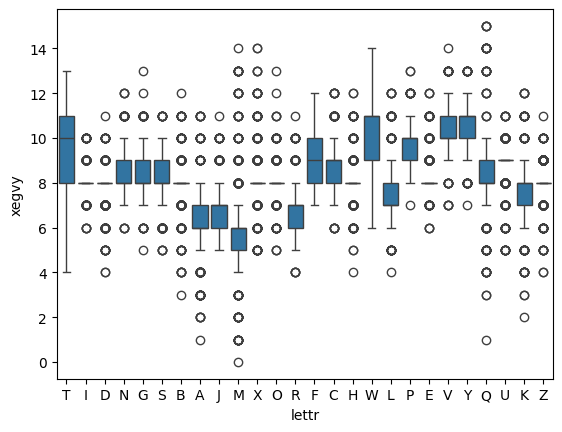

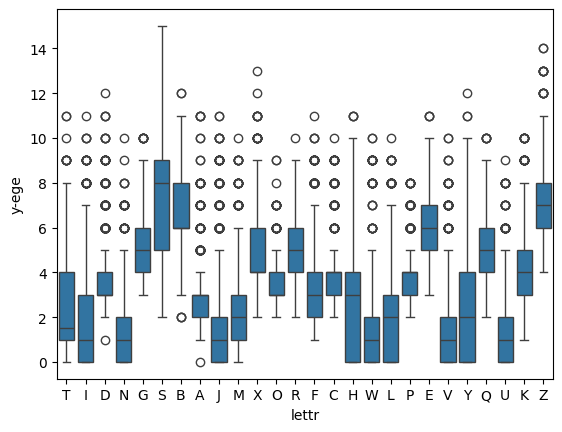

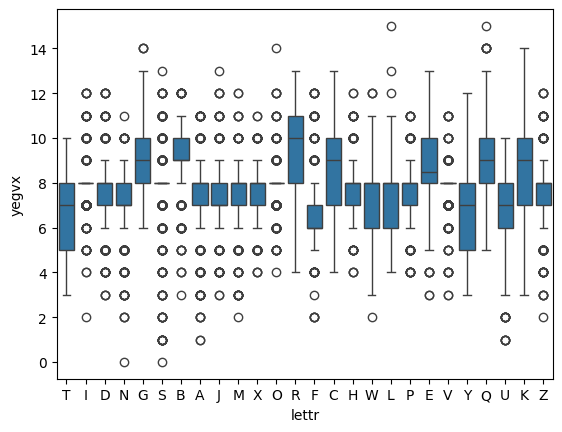

In [7]:
feature_names = df.columns

for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(x=target, y=feature_names[i], data=df)

## Pairplot

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


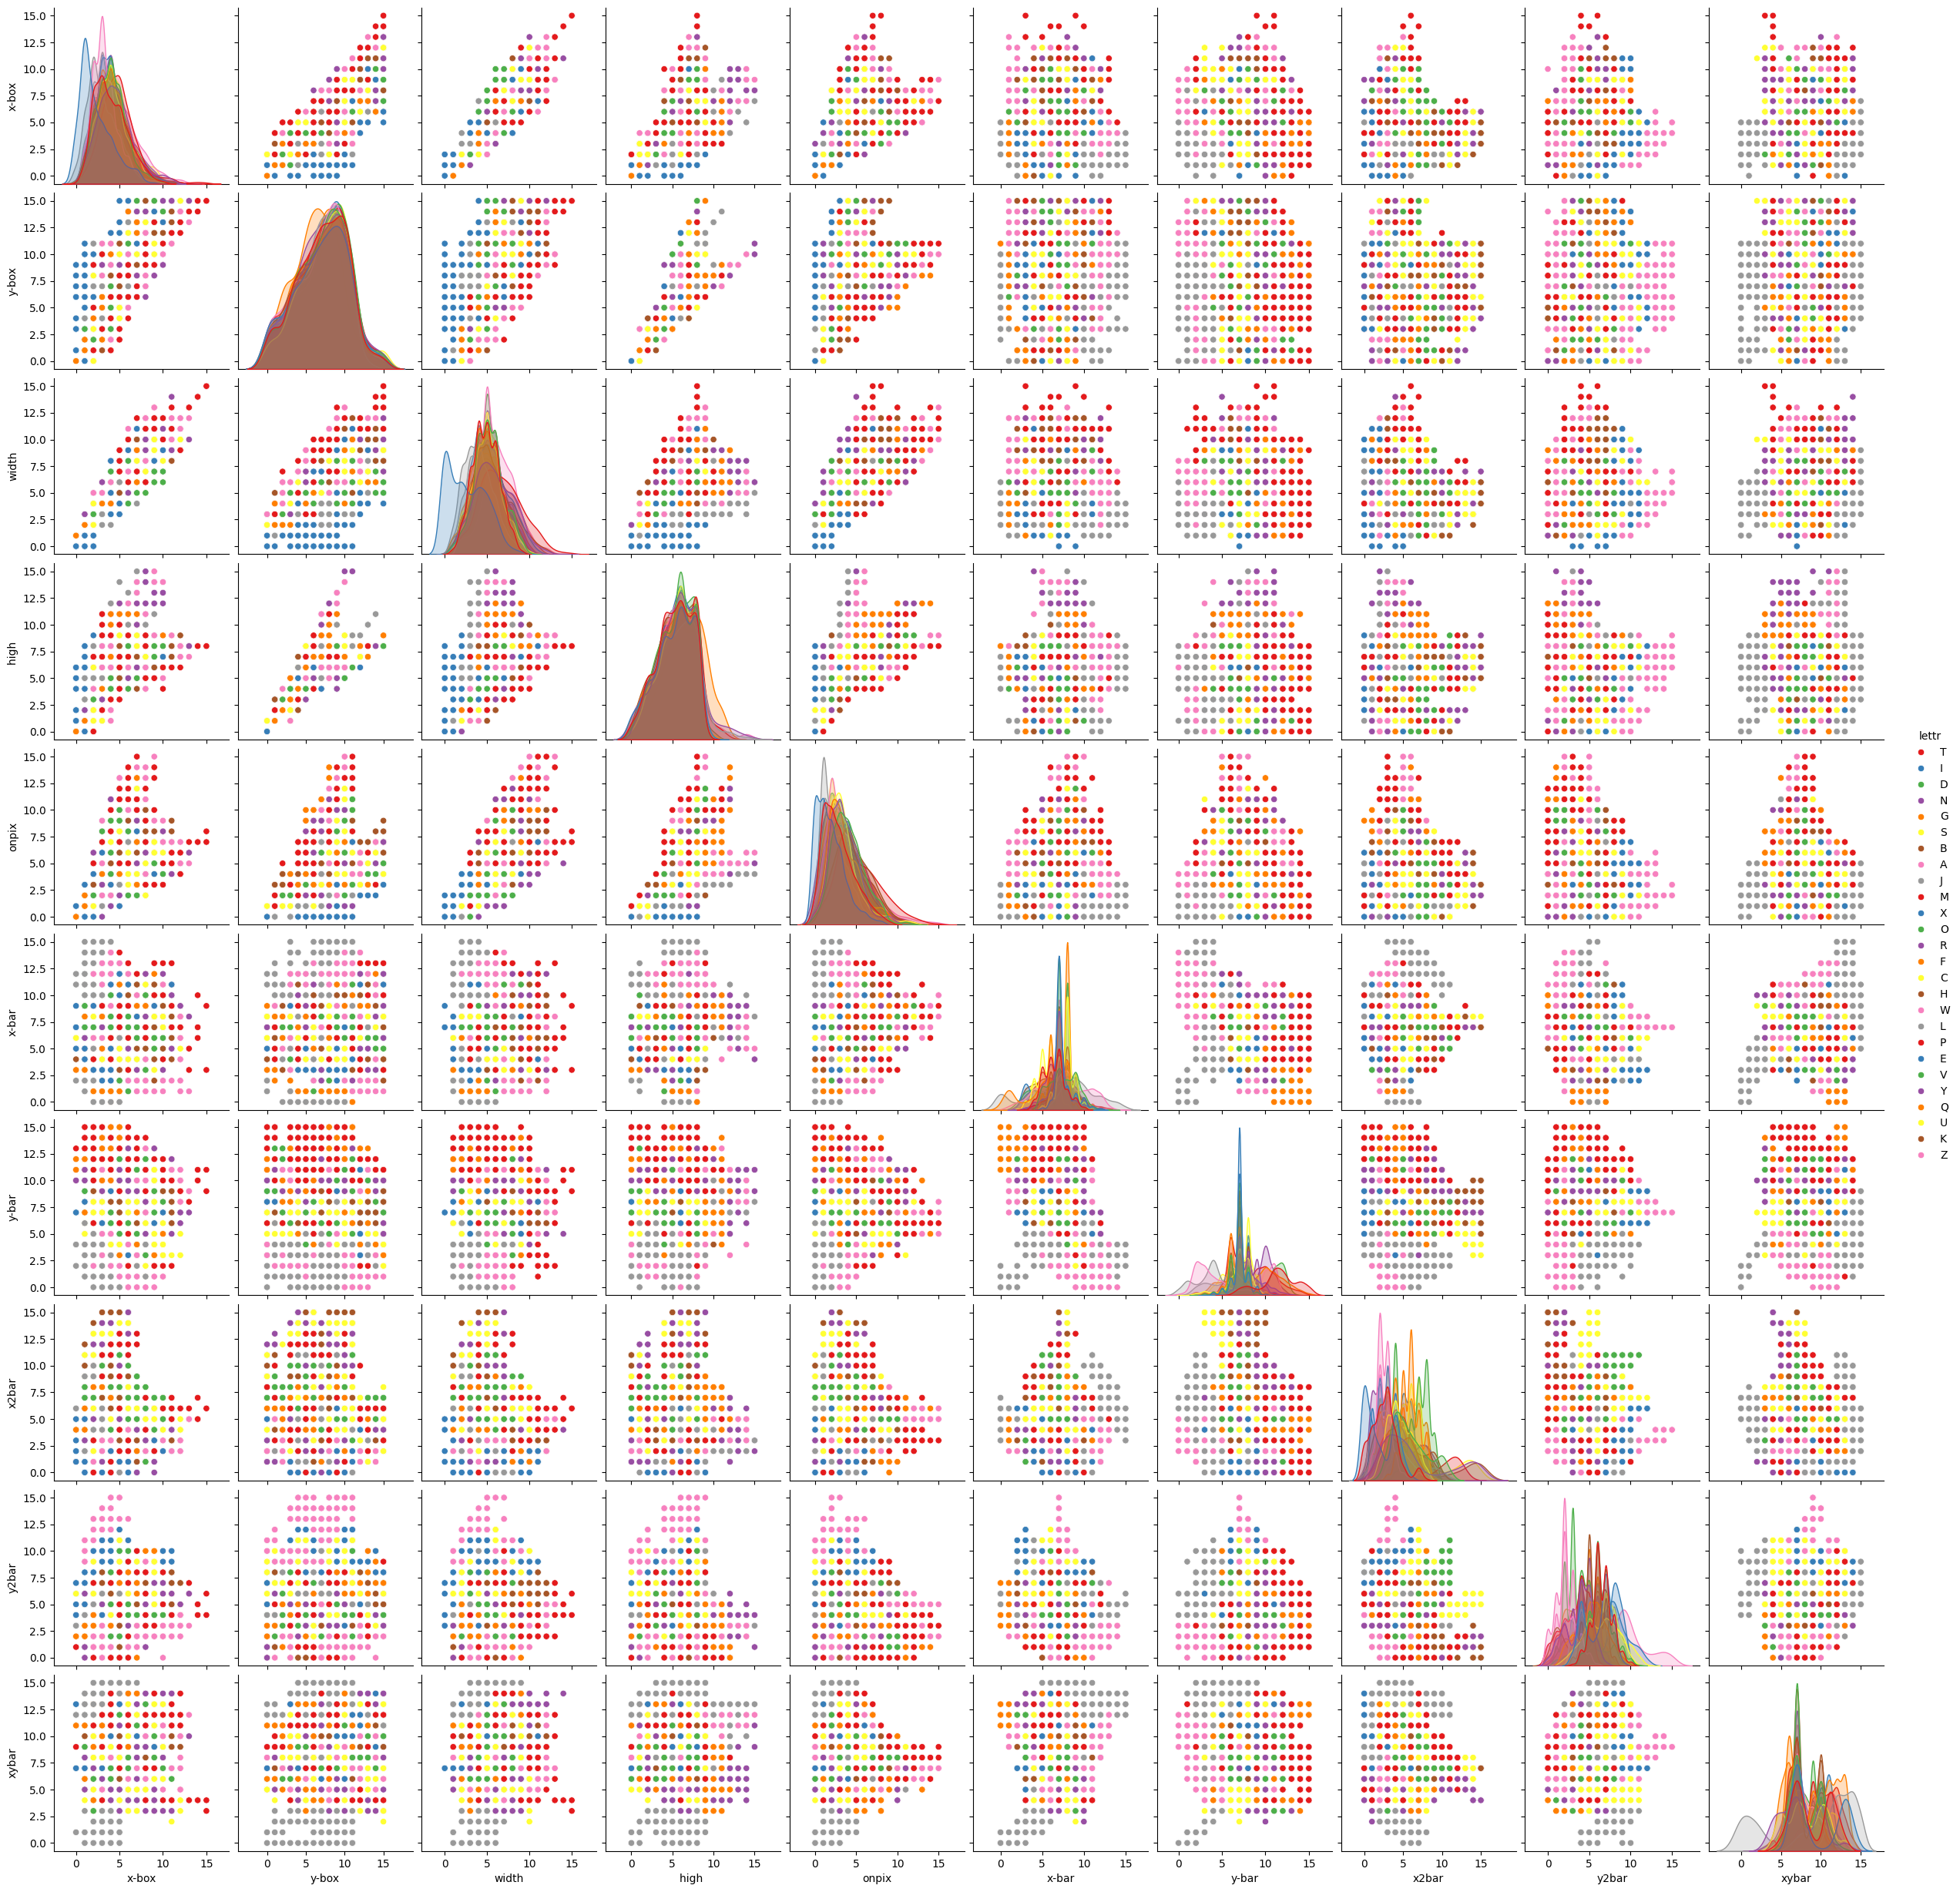

In [11]:
# part = df[["lettr","x-box","y-box","width","high ","onpix","x-bar","y-bar","x2bar","y2bar","xybar","x2ybr","xy2br","x-ege","xegvy","y-ege","yegvx"]]
part = df[["lettr","x-box","y-box","width","high ","onpix","x-bar","y-bar","x2bar","y2bar","xybar"]]
sns.pairplot(part, hue=target, palette = 'Set1')

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


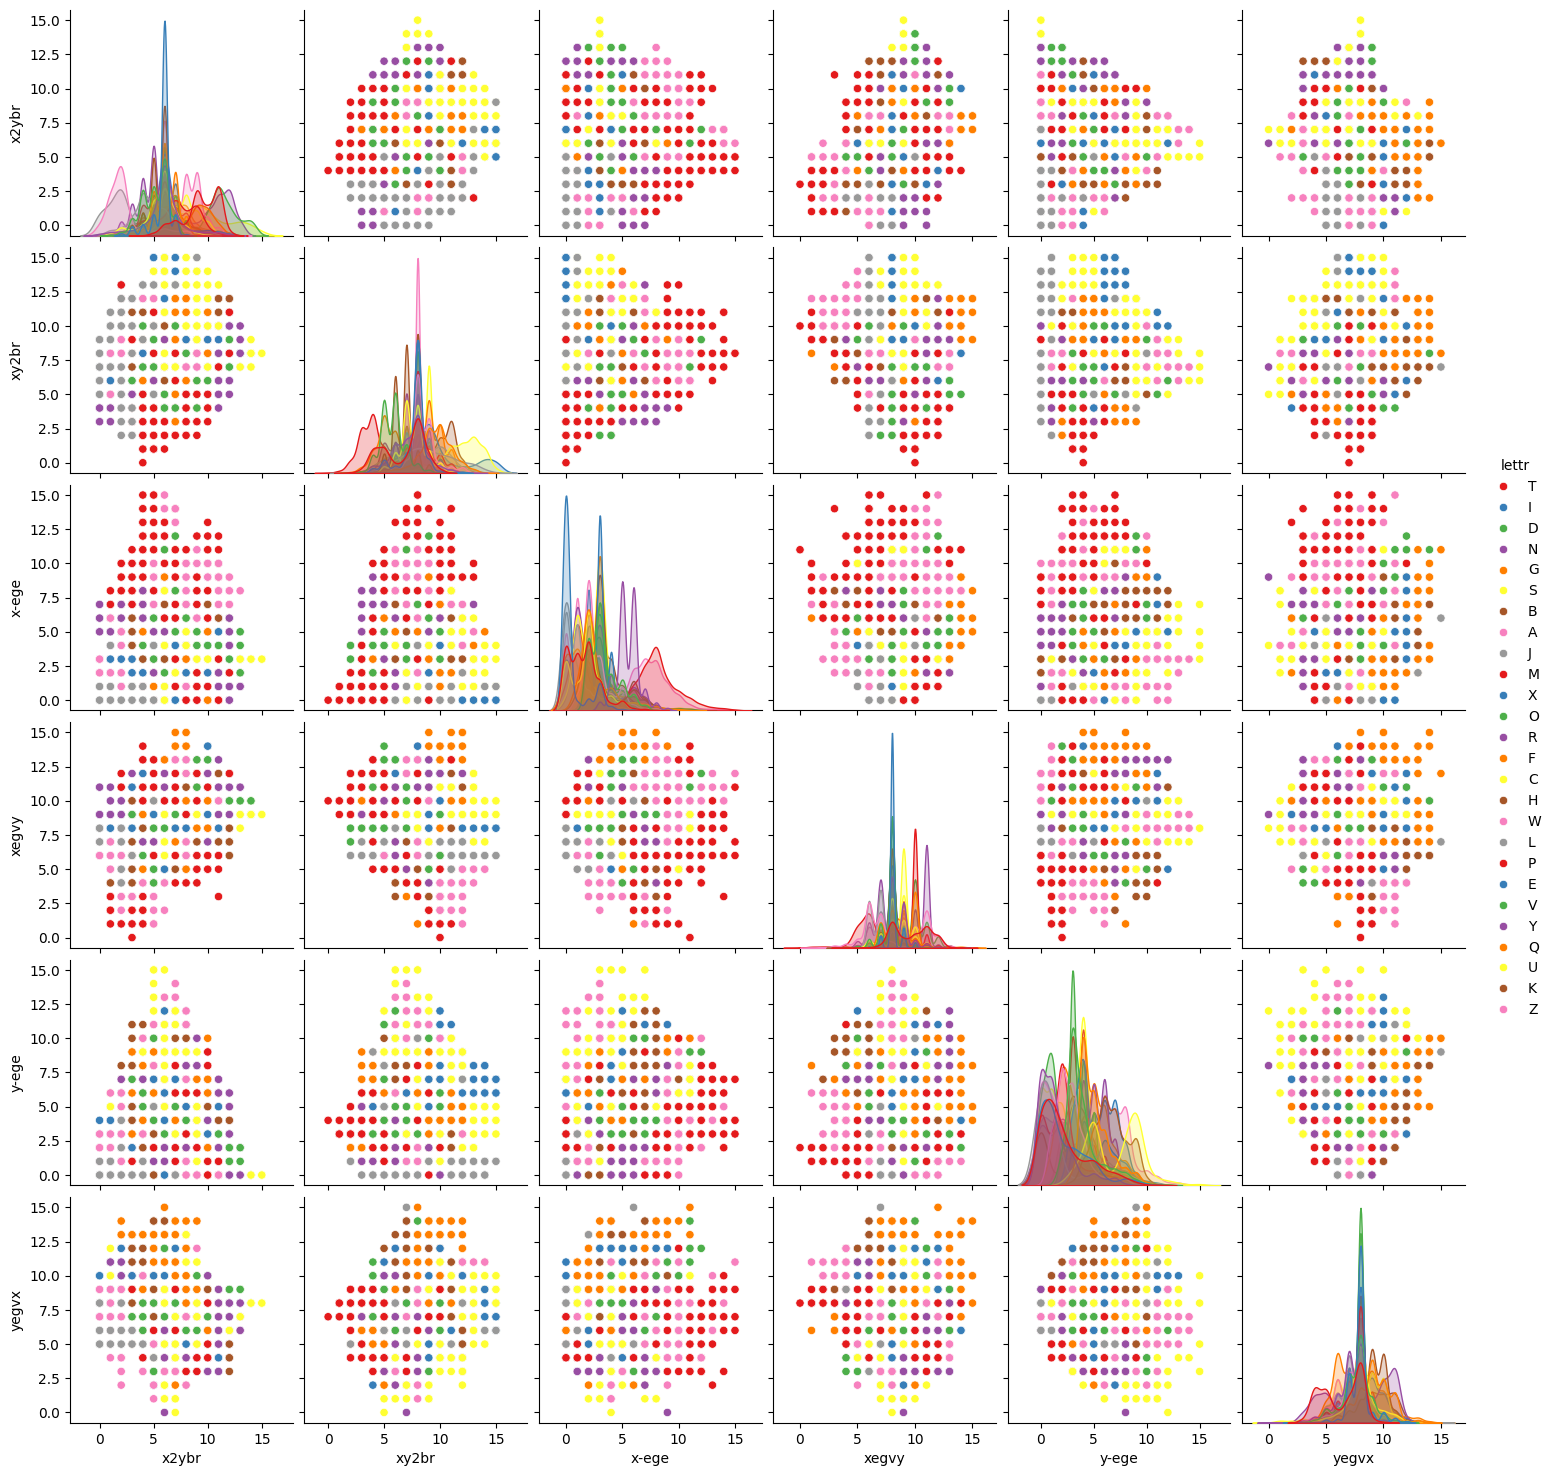

In [13]:
part2 = df[["lettr","x2ybr","xy2br","x-ege","xegvy","y-ege","yegvx"]]
sns.pairplot(part2, hue=target, palette = 'Set1')

## Normalisation

## Learning

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

> Divide data

In [42]:
train, test = train_test_split(df, test_size=0.2)

train_classes = train[target]
train = train.drop([target], axis=1)
test_classes = test[target]
test = test.drop([target], axis=1)

### KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, weights="distance", algorithm="brute")
knn.fit(train, train_classes)
prediction = knn.predict(test)

print(classification_report(test_classes, prediction))
confusion_matrix(test_classes, prediction)

              precision    recall  f1-score   support

           A       1.00      0.99      0.99       161
           B       0.91      0.95      0.93       151
           C       0.99      0.96      0.97       148
           D       0.92      0.95      0.93       149
           E       0.95      0.93      0.94       158
           F       0.95      0.93      0.94       155
           G       0.93      0.95      0.94       164
           H       0.88      0.90      0.89       144
           I       0.95      0.98      0.96       143
           J       0.98      0.93      0.95       151
           K       0.92      0.94      0.93       166
           L       0.99      0.97      0.98       158
           M       0.99      0.99      0.99       147
           N       0.99      0.96      0.97       157
           O       0.94      0.98      0.96       166
           P       0.98      0.95      0.96       166
           Q       0.97      0.96      0.97       160
           R       0.90    

array([[159,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 143,   0,   1,   0,   1,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0, 142,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 142,   1,   0,   0,   2,   0,   0,   1,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   1,   0, 147,   0,   7,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   1],
       [  0,   0,   0,   2,   0, 144,   0,   1,   0,   0,   0,   0,   0,
          1,   0,   4,   0,   1,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   2,   0, 156,   0,   0,   0,   1,   0,   0,
          0,   1,   0,   0,   0,   1,   0,   

### Choise tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=20, min_samples_split=2)
tree.fit(train,train_classes)
prediction = tree.predict(test)

print(classification_report(test_classes, prediction))
confusion_matrix(test_classes, prediction)

              precision    recall  f1-score   support

           A       0.94      0.94      0.94       161
           B       0.76      0.81      0.78       151
           C       0.91      0.84      0.87       148
           D       0.81      0.79      0.80       149
           E       0.83      0.85      0.84       158
           F       0.84      0.88      0.86       155
           G       0.83      0.85      0.84       164
           H       0.81      0.85      0.83       144
           I       0.93      0.90      0.91       143
           J       0.90      0.91      0.90       151
           K       0.83      0.92      0.87       166
           L       0.90      0.89      0.90       158
           M       0.90      0.95      0.92       147
           N       0.92      0.87      0.89       157
           O       0.86      0.87      0.86       166
           P       0.87      0.87      0.87       166
           Q       0.92      0.85      0.88       160
           R       0.87    

array([[151,   0,   0,   1,   0,   0,   1,   0,   0,   1,   0,   2,   0,
          0,   0,   0,   1,   1,   1,   0,   1,   0,   0,   0,   1,   0],
       [  0, 122,   0,   4,   1,   2,   2,   5,   1,   1,   0,   1,   0,
          1,   0,   1,   0,   1,   4,   0,   0,   2,   0,   1,   1,   1],
       [  0,   0, 125,   0,   8,   0,   7,   0,   0,   0,   3,   0,   0,
          0,   2,   0,   0,   1,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0, 118,   0,   3,   1,   6,   1,   2,   1,   0,   0,
          0,   1,   1,   0,   1,   4,   0,   1,   0,   0,   5,   0,   0],
       [  0,   1,   1,   0, 134,   2,   4,   1,   0,   0,   2,   0,   0,
          0,   0,   0,   2,   1,   3,   2,   0,   0,   2,   0,   0,   3],
       [  0,   2,   1,   0,   0, 137,   1,   2,   2,   1,   0,   0,   0,
          0,   0,   4,   0,   0,   1,   3,   0,   0,   0,   1,   0,   0],
       [  1,   0,   4,   1,   2,   0, 140,   1,   0,   2,   0,   4,   1,
          0,   2,   1,   2,   0,   1,   0,   

### SVM

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'gamma':('scale', 'auto'), 'C':[10, 15, 20, 25, 30]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(train, train_classes)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 15, 20, 25, 30], 'gamma': ('scale', 'auto')})

In [87]:

svc = SVC(C=15, gamma='auto')
svc.fit(train, train_classes)
prediction = svc.predict(test)

print(classification_report(test_classes, prediction))
confusion_matrix(test_classes, prediction)

              precision    recall  f1-score   support

           A       0.99      1.00      1.00       161
           B       0.96      0.97      0.97       151
           C       0.99      0.98      0.99       148
           D       0.94      0.97      0.95       149
           E       0.97      0.95      0.96       158
           F       0.98      0.94      0.96       155
           G       0.96      0.99      0.98       164
           H       0.92      0.94      0.93       144
           I       0.97      0.97      0.97       143
           J       0.97      0.96      0.97       151
           K       0.97      0.99      0.98       166
           L       0.99      0.97      0.98       158
           M       0.98      0.99      0.99       147
           N       0.99      0.98      0.98       157
           O       0.98      0.99      0.98       166
           P       0.98      0.98      0.98       166
           Q       0.99      0.98      0.98       160
           R       0.97    

array([[161,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 147,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0, 145,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 145,   1,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 150,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   3],
       [  0,   1,   0,   2,   0, 145,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   3,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0, 163,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=130, criterion="entropy", max_depth=20, min_samples_split=2)
rfc.fit(train,train_classes)
prediction = rfc.predict(test)

print(classification_report(test_classes, prediction))
confusion_matrix(test_classes, prediction)

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       161
           B       0.88      0.98      0.93       151
           C       0.99      0.97      0.98       148
           D       0.94      0.97      0.96       149
           E       0.96      0.94      0.95       158
           F       0.99      0.95      0.97       155
           G       0.96      0.97      0.97       164
           H       0.92      0.92      0.92       144
           I       0.98      0.95      0.96       143
           J       0.99      0.96      0.98       151
           K       0.94      0.94      0.94       166
           L       0.98      0.96      0.97       158
           M       0.97      0.99      0.98       147
           N       0.99      0.96      0.97       157
           O       0.96      0.98      0.97       166
           P       0.98      0.98      0.98       166
           Q       0.97      0.97      0.97       160
           R       0.93    

array([[160,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 148,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0,   0, 143,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  1,   1,   0, 145,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0, 149,   0,   4,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   3,   0,   0,   0, 147,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   1,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0,   0,   2,   0,   0, 159,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   1,   0,   0,   0,   

### AdaBoost

In [113]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=70, learning_rate=0.25)
abc.fit(train,train_classes)
prediction = abc.predict(test)

print(classification_report(test_classes, prediction))
confusion_matrix(test_classes, prediction)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           A       0.27      0.02      0.03       161
           B       0.44      0.78      0.56       151
           C       0.90      0.41      0.56       148
           D       0.64      0.49      0.56       149
           E       0.41      0.44      0.43       158
           F       0.48      0.55      0.51       155
           G       0.35      0.73      0.47       164
           H       0.06      0.23      0.10       144
           I       0.32      0.04      0.07       143
           J       0.32      0.74      0.44       151
           K       0.38      0.14      0.20       166
           L       0.78      0.04      0.08       158
           M       0.72      0.41      0.52       147
           N       0.69      0.54      0.60       157
           O       0.44      0.78      0.56       166
           P       0.75      0.53      0.62       166
           Q       0.29      0.15      0.20       160
           R       0.56    

array([[  3,   3,   0,   0,   0,   0,   6,  96,   0,  16,   2,   0,   0,
          0,   2,   0,  27,   4,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 118,   0,   0,   0,   0,   3,   3,   0,   0,   3,   0,   0,
          0,   2,   0,   1,  17,   1,   0,   0,   2,   0,   1,   0,   0],
       [  0,   0,  60,   0,  14,   0,  44,   6,   0,   0,   3,   0,   0,
          0,   3,   0,   0,   0,   2,   4,  10,   0,   0,   2,   0,   0],
       [  0,  23,   0,  73,   0,   2,   0,  17,   0,   7,   1,   0,   0,
          1,  17,   1,   1,   5,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   0,  70,   1,  28,   0,   0,   0,   5,   0,   0,
          0,   0,   0,   0,   4,   7,   8,   0,   2,   0,  30,   0,   0],
       [  1,   6,   0,   2,   0,  85,   2,   1,   5,  16,   0,   0,   0,
          2,   0,   8,   0,   1,   1,  17,   0,   3,   0,   5,   0,   0],
       [  0,   6,   0,   2,   1,   2, 119,   2,   0,   3,   4,   0,   0,
          0,   4,   0,  12,   2,   2,   0,   

Отже, найкраще себе показала модель SVC.